In [7]:
import os
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

from scipy.stats import pearsonr, spearmanr

from functions import *

# User-defined parameters
TC = 20                         # Increment value
UL = 150                        # Upper limit of parameter interval
DATA_SELECTION = 'ALL'            # Options: 'F', 'G', 'ALL'
PLANE = 'XY'                    # Options: 'XY', 'XZ', 'ZY'
B = 1000                        # Number of bootstrap samples
INTERVAL = 1                    # Grid interval
CL = 95                         # Confidence level
TRIMPCT = 20                    # Trim percentage
ALPHA = 0.01                    # Alpha for confidence intervals

ALL = pd.read_csv("data/ALLstars_with_radius_gaiadr3.csv")
F = pd.read_csv("data/Fstars_with_radius_gaiadr3.csv")
G = pd.read_csv("data/Gstars_with_radius_gaiadr3.csv")

ALL["vsin/radius"] = ALL["vsini"] / ALL["Rad"]
F["vsin/radius"] = F["vsini"] / F["Rad"]
G["vsin/radius"] = G["vsini"] / G["Rad"]

ALL = ALL.dropna(subset=['vsin/radius']).reset_index()
F = F.dropna(subset=['vsin/radius']).reset_index()
G = G.dropna(subset=['vsin/radius']).reset_index()

OLDSCHOOL = True

if OLDSCHOOL:
    import smplotlib
else:
    plt.rcParams.update({
        "xtick.top": True,
        "ytick.right": True,
        "xtick.direction": "in",
        "font.family": "Lato",
        "ytick.direction": "in",
        "font.size": 12,
        "axes.labelsize": 12,
        "axes.titlesize": 12,
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "xtick.minor.visible": True,
        "ytick.minor.visible": True
    })

OUTDIR = "figuresNEWAGE"
if not os.path.exists(OUTDIR):
    os.makedirs(OUTDIR)

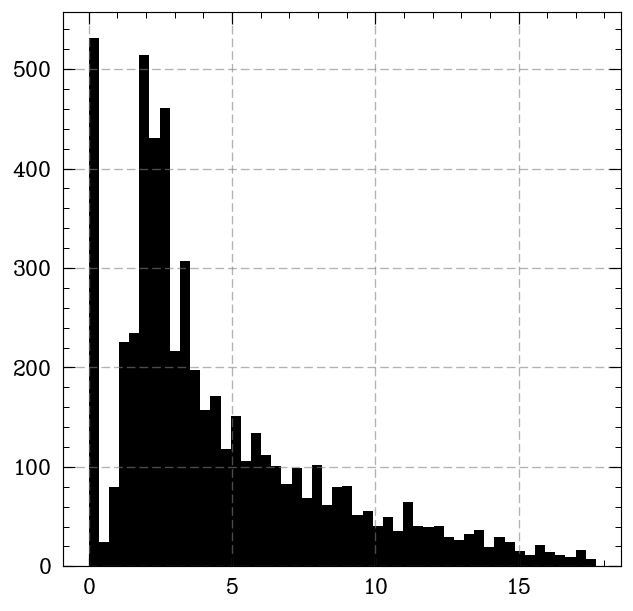

In [5]:
ALL["Age"].hist(bins=50);

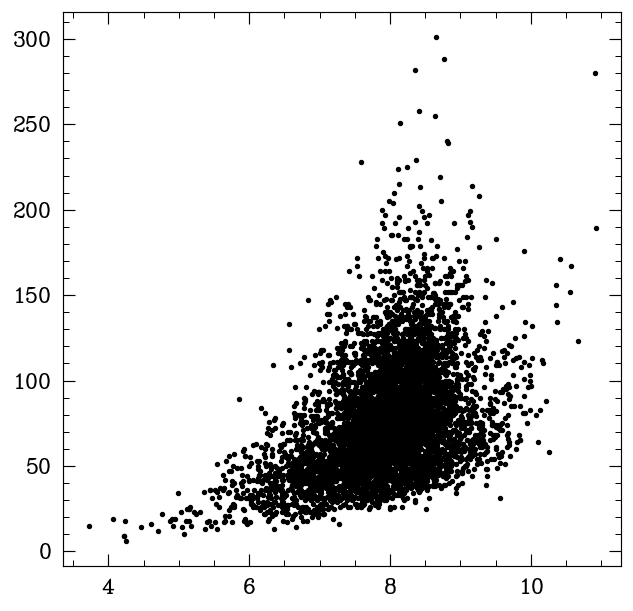

In [185]:
plt.scatter(ALL["Vmag"], ALL["Dist"], s=5)

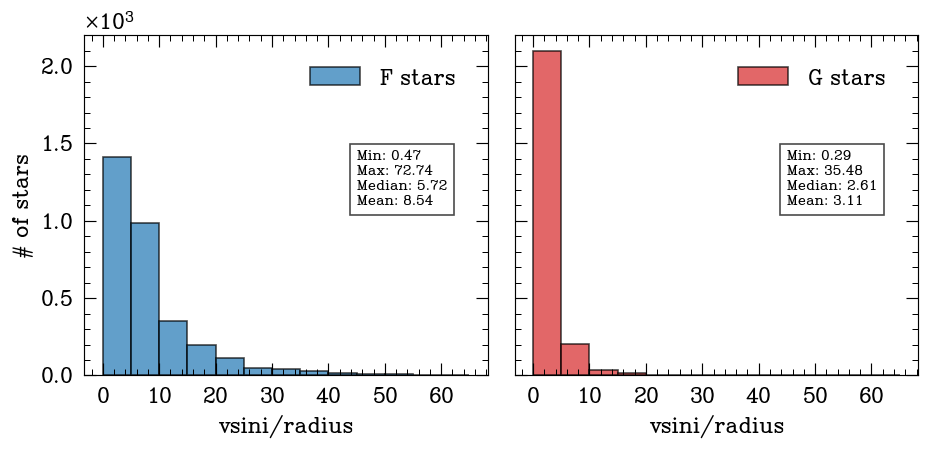

In [169]:
_, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,4))

bin_edges = np.arange(0, 70, 5)

ax[0].hist(F['vsin/radius'], bins=bin_edges, alpha=0.7, label='F stars', color="tab:blue", ec="k")
ax[1].hist(G['vsin/radius'], bins=bin_edges, alpha=0.7, label='G stars', color="tab:red", ec="k")

ax[0].set_ylabel('# of stars')

for a in ax:
    a.set_xlabel('vsini/radius') 
    a.set_xticks(np.arange(0,70,10))
    a.legend()

F_min, F_max = np.min(F['vsin/radius']), np.max(F['vsin/radius'])
F_median, F_mean = np.median(F['vsin/radius']), np.mean(F['vsin/radius'])

G_min, G_max = np.min(G['vsin/radius']), np.max(G['vsin/radius'])
G_median, G_mean = np.median(G['vsin/radius']), np.mean(G['vsin/radius'])

F_stats = f"Min: {F_min:.2f}\nMax: {F_max:.2f}\nMedian: {F_median:.2f}\nMean: {F_mean:.2f}"
G_stats = f"Min: {G_min:.2f}\nMax: {G_max:.2f}\nMedian: {G_median:.2f}\nMean: {G_mean:.2f}"

ax[0].text(45, 1100, F_stats, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
ax[1].text(45, 1100, G_stats, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout();

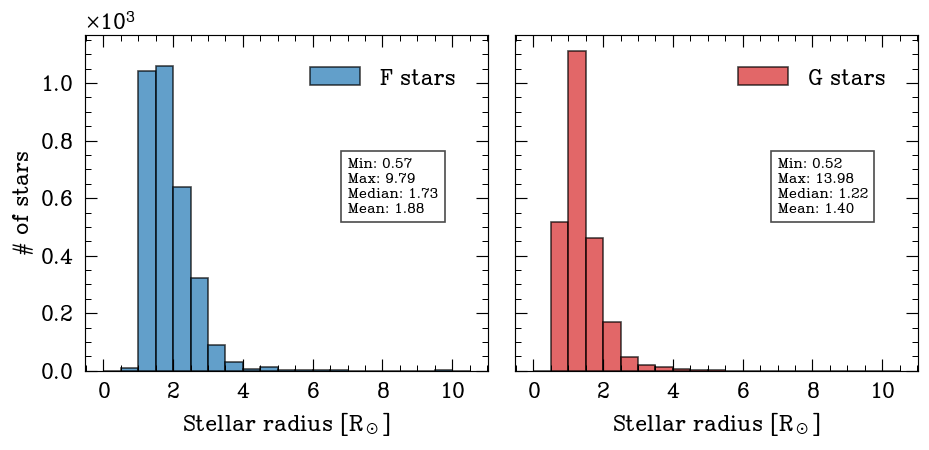

In [170]:
_, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,4))

bin_edges = np.arange(0, 11, 0.5)

ax[0].hist(F['Rad'], bins=bin_edges, alpha=0.7, label='F stars', color="tab:blue", ec="k")
ax[1].hist(G['Rad'], bins=bin_edges, alpha=0.7, label='G stars', color="tab:red", ec="k")

ax[0].set_ylabel('# of stars')

for a in ax:
    a.set_xlabel('Stellar radius [R$_\odot$]') 
    a.set_xticks(np.arange(0,12,2))
    a.legend()

F_min, F_max = np.min(F['Rad']), np.max(F['Rad'])
F_median, F_mean = np.median(F['Rad']), np.mean(F['Rad'])

G_min, G_max = np.min(G['Rad']), np.max(G['Rad'])
G_median, G_mean = np.median(G['Rad']), np.mean(G['Rad'])

F_stats = f"Min: {F_min:.2f}\nMax: {F_max:.2f}\nMedian: {F_median:.2f}\nMean: {F_mean:.2f}"
G_stats = f"Min: {G_min:.2f}\nMax: {G_max:.2f}\nMedian: {G_median:.2f}\nMean: {G_mean:.2f}"

ax[0].text(7, 550, F_stats, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
ax[1].text(7, 550, G_stats, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout();

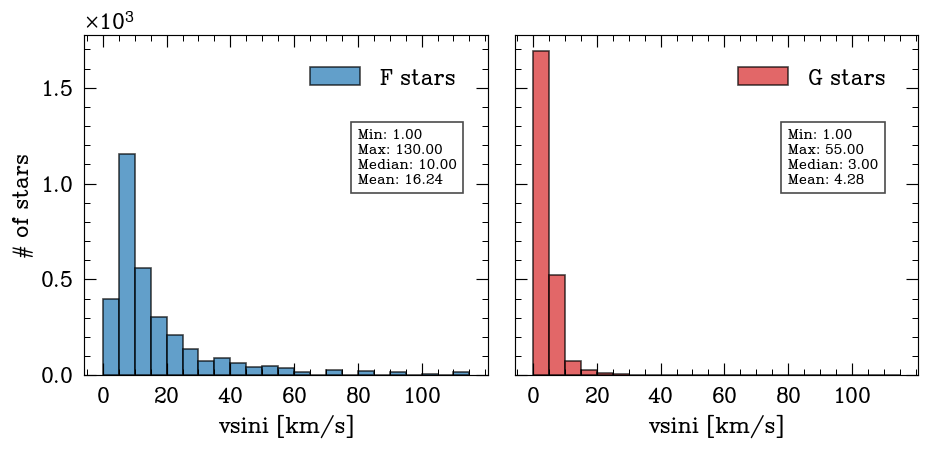

In [171]:
_, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,4))

bin_edges = np.arange(0, 120, 5)

ax[0].hist(F['vsini'], bins=bin_edges, alpha=0.7, label='F stars', color="tab:blue", ec="k")
ax[1].hist(G['vsini'], bins=bin_edges, alpha=0.7, label='G stars', color="tab:red", ec="k")

ax[0].set_ylabel('# of stars')

for a in ax:
    a.set_xlabel('vsini [km/s]') 
    a.set_xticks(np.arange(0,120,20))
    a.legend()

F_min, F_max = np.min(F['vsini']), np.max(F['vsini'])
F_median, F_mean = np.median(F['vsini']), np.mean(F['vsini'])

G_min, G_max = np.min(G['vsini']), np.max(G['vsini'])
G_median, G_mean = np.median(G['vsini']), np.mean(G['vsini'])

F_stats = f"Min: {F_min:.2f}\nMax: {F_max:.2f}\nMedian: {F_median:.2f}\nMean: {F_mean:.2f}"
G_stats = f"Min: {G_min:.2f}\nMax: {G_max:.2f}\nMedian: {G_median:.2f}\nMean: {G_mean:.2f}"

ax[0].text(80, 1000, F_stats, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
ax[1].text(80, 1000, G_stats, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout();

In [8]:
################################### FIGURE 5 ###################################

if DATA_SELECTION == 'F':
    data = F
elif DATA_SELECTION == 'G':
    data = G
elif DATA_SELECTION == 'ALL':
    data = ALL
else:
    raise ValueError("Invalid data selection. Choose 'F', 'G', or 'ALL'.")

# Extract variables based on plane
if PLANE == 'XY':
    x = data["X"]
    y = data["Y"]
elif PLANE == 'XZ':
    x = data["X"]
    y = data["Z"]
elif PLANE == 'ZY':
    x = data["Z"]
    y = data["Y"]
else:
    raise ValueError("Invalid plane selection. Choose 'XY', 'XZ', or 'ZY'.")

vsini = data['Age']
DPtotal = np.std(vsini)

ttx = np.arange(-UL, UL + INTERVAL * TC, INTERVAL * TC)
tty = np.arange(-UL, UL + INTERVAL * TC, INTERVAL * TC)
Nx = len(ttx) - 1
Ny = len(tty) - 1

# Initialize arrays
meanbootstrap = np.zeros((Ny, Nx))
meanbootstrapSD = np.zeros((Ny, Nx))
percentile25boot = np.zeros((Ny, Nx))
percentile50boot = np.zeros((Ny, Nx))
percentile75boot = np.zeros((Ny, Nx))

meanoriginal = np.zeros((Ny, Nx))
meanoriginalSD = np.zeros((Ny, Nx))
percentile25 = np.zeros((Ny, Nx))
percentile50 = np.zeros((Ny, Nx))
percentile75 = np.zeros((Ny, Nx))

boot_mean = np.zeros((Ny, Nx))
boot_se = np.zeros((Ny, Nx))
ci1 = np.zeros((Ny, Nx))
ci2 = np.zeros((Ny, Nx))
shape = np.zeros((Ny, Nx))
countfXY = np.zeros((Ny, Nx))

for j in range(Nx):
    for i in range(Ny):
        condition = (
            (ttx[j] <= x) & (x < ttx[j + 1]) &
            (tty[i] <= y) & (y < tty[i + 1])
        )
        vsini_condition = vsini[condition]
        count = len(vsini_condition)
        countfXY[i, j] = count

        if count >= 20:
            # Calculate statistics for original data
            meanoriginal[i, j] = np.mean(vsini_condition)
            meanoriginalSD[i, j] = np.std(vsini_condition)
            percentile25[i, j] = np.percentile(vsini_condition, 25)
            percentile50[i, j] = np.percentile(vsini_condition, 50)
            percentile75[i, j] = np.percentile(vsini_condition, 75)

            # Generate bootstrap samples
            samples = bootrsp(vsini_condition.values, B)  # Shape: [N, B]
            bootout = np.array([trimmean2(samples[:, b], TRIMPCT) for b in range(B)])

            # Compute bootstrap statistics
            #boot_true = trimmean2(vsini_condition, TRIMPCT)
            boot_mean[i, j] = np.mean(bootout)
            boot_se[i, j] = np.std(bootout)
            meanbootstrap[i, j] = boot_mean[i, j]
            meanbootstrapSD[i, j] = boot_se[i, j]

            # Compute confidence intervals
            lower_percentile = (ALPHA / 2) * 100
            upper_percentile = (1 - ALPHA / 2) * 100
            ci1[i, j] = np.percentile(bootout, lower_percentile)
            ci2[i, j] = np.percentile(bootout, upper_percentile)

            # Percentiles for bootstrap samples
            percentile25boot[i, j] = np.percentile(bootout, 25)
            percentile50boot[i, j] = np.percentile(bootout, 50)
            percentile75boot[i, j] = np.percentile(bootout, 75)

# Calculate shape and length indices
length = ci2 - ci1
shape = (ci2 - boot_mean) / (boot_mean - ci1)
shape = np.nan_to_num(shape)  # Replace NaN with zero

# Print completion message
print("\n##### Bootstrap and grid analysis completed. #####")

# First set of plots
data_dict1 = {
    r'$\langle v \sin i / radius \rangle$ of original sample': meanoriginal,
    r'$v \sin i / radius$ (q = 1/4)': percentile25,
    r'$v \sin i / radius$ (q = 1/2)': percentile50,
    r'$v \sin i / radius$ (q = 3/4)': percentile75
}
plotfig(data_dict1, UL, PLANE, DATA_SELECTION, figure_number=5, OUTDIR=OUTDIR)
print(f"\n>> Image successfully saved as 'fig5_{DATA_SELECTION}_{PLANE}.png' in {OUTDIR} folder")


##### Bootstrap and grid analysis completed. #####

>> Image successfully saved as 'fig5_ALL_XY.png' in figuresNEWAGE folder


In [173]:
################################### FIGURE 6 ###################################

data_dict2 = {
    r'$\langle v \sin i / radius \rangle$' + '\n' + 'of bootstrap resampling': meanbootstrap,
    r'$v \sin i / radius$' + '\n' + 'of bootstrap resampling (q=1/4)': percentile25boot,
    r'$v \sin i / radius$' + '\n' + 'of bootstrap resampling (q=1/2)': percentile50boot,
    r'$v \sin i / radius$' + '\n' + 'of bootstrap resampling (q=3/4)': percentile75boot
}
plotfig(data_dict2, UL, PLANE, DATA_SELECTION, figure_number=6, OUTDIR=OUTDIR)
print(f">> Image successfully saved as 'fig6_{DATA_SELECTION}_{PLANE}.png' in {OUTDIR} folder")

>> Image successfully saved as 'fig6_G_ZY.png' in figuresNEW folder


In [174]:
################################### FIGURE 7 ###################################

data_dict3 = {
    r'$\langle v \sin i / radius \rangle$' + '\n' + 'of original sample': meanoriginal,
    r'$\langle v \sin i / radius \rangle$' + '\n' + 'of bootstrap resampling': boot_mean,
    'Length Index': length,
    'Shape Index': shape
}
plotfig(data_dict3, UL, PLANE, DATA_SELECTION, figure_number=7, OUTDIR=OUTDIR)
print(f">> Image successfully saved as 'fig7_{DATA_SELECTION}_{PLANE}.png' in {OUTDIR} folder")

>> Image successfully saved as 'fig7_G_ZY.png' in figuresNEW folder
